# Generate a product dependency graph from ODC DEA product

In [83]:
import string
from graphviz import Digraph
import datacube
dc = datacube.Datacube()

# Get Candidate Product UUID

In [84]:
for i in dc.list_products().name:
    print(i)

aster_aloh_group_composition
aster_aloh_group_content
aster_false_colour
aster_feoh_group_content
aster_ferric_oxide_composition
aster_ferric_oxide_content
aster_ferrous_iron_content_in_mgoh
aster_ferrous_iron_index
aster_green_vegetation
aster_gypsum_index
aster_kaolin_group_index
aster_mgoh_group_composition
aster_mgoh_group_content
aster_opaque_index
aster_quartz_index
aster_regolith_ratios
aster_silica_index
cemp_insar_alos_displacement
cemp_insar_alos_velocity
cemp_insar_envisat_displacement
cemp_insar_envisat_velocity
cemp_insar_radarsat2_displacement
cemp_insar_radarsat2_velocity
fc_percentile_albers_annual
fc_percentile_albers_seasonal
ga_ls5t_ard_3
ga_ls5t_nbart_gm_cyear_3
ga_ls7e_ard_3
ga_ls7e_ard_provisional_3
ga_ls7e_nbart_gm_cyear_3
ga_ls8c_ard_3
ga_ls8c_ard_provisional_3
ga_ls8c_nbart_gm_cyear_3
ga_ls_fc_3
ga_ls_landcover_class_cyear_2
ga_ls_tcw_percentiles_2
ga_ls_wo_3
ga_ls_wo_fq_apr_oct_3
ga_ls_wo_fq_cyear_3
ga_ls_wo_fq_myear_3
ga_ls_wo_fq_nov_mar_3
ga_s2am_ard_provisi

In [85]:
def get_sample_product_id(product):
    # get a sample id to represent the product
    sample_id = dc.index.datasets.search_eager(product=product)[0].metadata_doc['id']
    return(sample_id)

In [86]:
def get_source_product(sample_id):
    # retrieve a sample metadata source using the sample_id but with sources included (excluded by default)
    sample_md = dc.index.datasets.get(sample_id, include_sources=True)
   
    sources_dict = {}
    product_list = []
    
    for i in sample_md.sources:
        
        sources_dict[sample_md.sources[i].type.name] = str(sample_md.sources[i].id)
        
    return(({sample_md.type.name: list(set(sources_dict))} , sources_dict))
    

In [5]:
# Example execution to seed graph with product of choice
#product_id = get_sample_product_id('high_tide_comp_20p')

In [9]:
# Manually manufacture a candidate product UUID for a list of products
product_list = ['ga_ls5t_ard_3',
'ga_ls5t_nbart_gm_cyear_3',
'ga_ls7e_ard_3',
'ga_ls7e_ard_provisional_3',
'ga_ls7e_nbart_gm_cyear_3',
'ga_ls8c_ard_3',
'ga_ls8c_ard_provisional_3',
'ga_ls8c_nbart_gm_cyear_3',
'ga_ls_fc_3',
'ga_ls_wo_3',
'ga_ls_wo_fq_apr_oct_3',
'ga_ls_wo_fq_cyear_3',
'ga_ls_wo_fq_myear_3',
'ga_ls_wo_fq_nov_mar_3']


In [7]:
# Manually manufacture a candidate product UUID for a list of products
#product_list = [
#'wofs_annual_summary',
#'wofs_apr_oct_summary',
#'wofs_filtered_summary',
#'wofs_nov_mar_summary',
#'wofs_summary']

In [10]:
# Run this to generate UUIDs for the list of product created above
# WARNING! takes forever as no shortcut to only search for a representative UUID in a common way

product_id_list = []
for product in product_list:
    print([product, get_sample_product_id(product)])
    product_id_list.append([product, get_sample_product_id(product)])

['ga_ls5t_ard_3', 'c65d65f8-aabd-4fea-b2ca-f1673b05da88']
['ga_ls5t_nbart_gm_cyear_3', 'd1922cf0-81fa-4d3a-8ca2-87300ab8ec38']
['ga_ls7e_ard_3', '4498367b-0481-49fe-9b58-063f2e9d2864']
['ga_ls7e_ard_provisional_3', '64ad5409-39c0-49ed-aa5e-da9216cbbbb0']
['ga_ls7e_nbart_gm_cyear_3', '6a7b6b79-7fc9-4c35-b4ee-ebfae26ac244']
['ga_ls8c_ard_3', '9014d183-527a-4106-9053-037c35d3f38b']
['ga_ls8c_ard_provisional_3', '803b1db2-3537-4cbe-a70c-7a9ce1e14216']
['ga_ls8c_nbart_gm_cyear_3', '5e2443b9-ee0a-492d-9cea-252a723e646f']
['ga_ls_fc_3', '71766196-2207-5dc4-8e2f-ba6ad42bd3f2']
['ga_ls_wo_3', 'd49e541b-3271-53a6-9c4e-816ce1a880d9']
['ga_ls_wo_fq_apr_oct_3', 'c90ed428-7f62-4eb7-8ab0-b95466efcf76']
['ga_ls_wo_fq_cyear_3', '65c0e2d0-871f-4606-9195-8ff4c3c76b79']
['ga_ls_wo_fq_myear_3', '6fe15c55-2ca6-44bf-ab44-a2392e55021c']
['ga_ls_wo_fq_nov_mar_3', '7edc36ed-8654-4aac-91a1-d9a88e22cf1e']


In [48]:
product_id_list = [['ga_ls5t_ard_3', 'c65d65f8-aabd-4fea-b2ca-f1673b05da88'],
['ga_ls5t_nbart_gm_cyear_3', 'd1922cf0-81fa-4d3a-8ca2-87300ab8ec38'],
['ga_ls7e_ard_3', '4498367b-0481-49fe-9b58-063f2e9d2864'],
['ga_ls7e_ard_provisional_3', '64ad5409-39c0-49ed-aa5e-da9216cbbbb0'],
['ga_ls7e_nbart_gm_cyear_3', '6a7b6b79-7fc9-4c35-b4ee-ebfae26ac244'],
['ga_ls8c_ard_3', '9014d183-527a-4106-9053-037c35d3f38b'],
['ga_ls8c_ard_provisional_3', '803b1db2-3537-4cbe-a70c-7a9ce1e14216'],
['ga_ls8c_nbart_gm_cyear_3', '5e2443b9-ee0a-492d-9cea-252a723e646f'],
['ga_ls_fc_3', '71766196-2207-5dc4-8e2f-ba6ad42bd3f2'],
['ga_ls_wo_3', 'd49e541b-3271-53a6-9c4e-816ce1a880d9'],
['ga_ls_wo_fq_apr_oct_3', 'c90ed428-7f62-4eb7-8ab0-b95466efcf76'],
['ga_ls_wo_fq_cyear_3', '65c0e2d0-871f-4606-9195-8ff4c3c76b79'],
['ga_ls_wo_fq_myear_3', '6fe15c55-2ca6-44bf-ab44-a2392e55021c'],
['ga_ls_wo_fq_nov_mar_3', '7edc36ed-8654-4aac-91a1-d9a88e22cf1e']]

In [91]:
def get_source_description(product):
    return(products[dc.list_products()['name']==product].description[0])
    

In [49]:
def get_product_graph(product_id):
    id_list = []
    sources_list = []
    # get an initial set of UUIDs
    tree, sources_dict = get_source_product(product_id)

    # for each UUID - get their decendent UUID and work up the tree until no sources returned
    for source in sources_dict:
        id_list.append(sources_dict[source])
    sources_list.append(tree)

    # while requests for source products return results i.e. not {},
    while len(id_list) != 0:

        # for each UUID in the list
        for i in id_list:        
            id_list.remove(i)

            tree, sources_dict = get_source_product(i)
            if tree not in sources_list:
                sources_list.append(tree)
            if not sources_dict == {}: 
                for source in sources_dict:
                    id_list.append(sources_dict[source])

    alphabet = string.ascii_uppercase
    count = 0
    dot_list = []
    dot = Digraph(comment='DEA Product Dependency Graphviz')
    index_alpha = {}
    for i in sources_list:
        index_alpha[list(i.keys())[0]] = alphabet[count]
        dot_list.append((alphabet[count], list(i.keys())[0]))
        dot.node(alphabet[count], list(i.keys())[0])
        count = count+1
    dot_edges = []
    for source in sources_list:
 
        for i in source[list(source.keys())[0]]:
            if not i == None: 
                dot_edges.append(index_alpha[i]+index_alpha[list(source.keys())[0]])
    dot.edges(dot_edges)
    return(dot)

In [134]:
product_id = '6fe15c55-2ca6-44bf-ab44-a2392e55021c'

id_list = []
sources_list = []
# get an initial set of UUIDs
tree, sources_dict = get_source_product(product_id)

# for each UUID - get their decendent UUID and work up the tree until no sources returned
for source in sources_dict:
    id_list.append(sources_dict[source])
sources_list.append(tree)

# while requests for source products return results i.e. not {},
while len(id_list) != 0:

    # for each UUID in the list
    for i in id_list:        
        id_list.remove(i)

        tree, sources_dict = get_source_product(i)
        if tree not in sources_list:
            sources_list.append(tree)
        if not sources_dict == {}: 
            for source in sources_dict:
                id_list.append(sources_dict[source])

alphabet = string.ascii_uppercase
count = 0
dot_list = []
dot = Digraph(comment='DEA Product Dependency Graphviz')
index_alpha = {}
for i in sources_list:
    index_alpha[list(i.keys())[0]] = alphabet[count]
    dot_list.append((alphabet[count], list(i.keys())[0]))
    dot.node(alphabet[count], list(i.keys())[0])
    count = count+1
dot_edges = []
for source in sources_list:

    for i in source[list(source.keys())[0]]:
        if not i == None: 
            dot_edges.append(index_alpha[i]+index_alpha[list(source.keys())[0]])
dot.edges(dot_edges)

In [135]:
index_alpha['ga_ls5t_ard_3'] = 'F'
index_alpha['ga_ls7e_ard_3'] = 'E'

In [136]:
dot_list.append(('F', 'ga_ls5t_ard_3'))

In [137]:
dot_list.append(('E', 'ga_ls7e_ard_3'))

In [138]:
dot_list

[('A', 'ga_ls_wo_fq_myear_3'),
 ('B', 'ga_ls_wo_fq_cyear_3'),
 ('C', 'ga_ls_wo_3'),
 ('D', 'ga_ls8c_ard_3'),
 ('F', 'ga_ls5t_ard_3'),
 ('E', 'ga_ls7e_ard_3')]

In [139]:
dot_edges

['BA', 'CB', 'DC']

In [140]:
dot_edges.append('FC')
dot_edges.append('EC')

In [141]:
dot.edges(dot_edges)

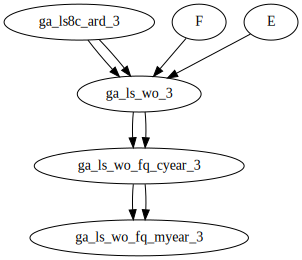

In [142]:
dot

In [50]:
dotlist = []
for i in product_id_list:
    dot = get_product_graph(i[1])
    dot.render(i[0]+'.gv')
    dotlist.append(dot)

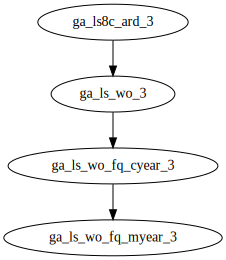

In [51]:
dotlist[12]

In [35]:
type(dot)

graphviz.dot.Digraph

In [32]:
dot = """// DEA Product Dependency Graphviz 
digraph {
	A [label=ga_ls_wo_fq_nov_mar_3]
	B [label=ga_ls_wo_3]
	C [label=ga_ls5t_ard_3]
	B -> A
	C -> B
}"""

In [ ]:
# TODO Build giant tree of all products
# build on tree information looping through product_id_list
# what to do with alphabet limit - will be exceeded

In [53]:
get_source_product('6fe15c55-2ca6-44bf-ab44-a2392e55021c')

({'ga_ls_wo_fq_myear_3': ['ga_ls_wo_fq_cyear_3']},
 {'ga_ls_wo_fq_cyear_3': '39a7431a-d734-4430-a61e-c34d6b0ea517'})

In [54]:
get_source_product('39a7431a-d734-4430-a61e-c34d6b0ea517')

({'ga_ls_wo_fq_cyear_3': ['ga_ls_wo_3']},
 {'ga_ls_wo_3': '01c79bfb-c22e-552c-8fc0-45341afa1827'})

In [55]:
get_source_product('01c79bfb-c22e-552c-8fc0-45341afa1827')

({'ga_ls_wo_3': ['ga_ls8c_ard_3']},
 {'ga_ls8c_ard_3': '3e1f54f5-7a08-493e-99a6-c8a3ae9f3dd9'})

In [56]:
get_source_product('3e1f54f5-7a08-493e-99a6-c8a3ae9f3dd9')

({'ga_ls8c_ard_3': []}, {})

In [59]:
products = dc.list_products()

In [82]:
products[dc.list_products()['name']=='ga_ls_wo_fq_cyear_3'].description[0]

'Geoscience Australia Landsat Water Observations Frequency Calendar Year Collection 3'

In [93]:
get_source_description('ga_ls_wo_fq_cyear_3')

'Geoscience Australia Landsat Water Observations Frequency Calendar Year Collection 3'